In [1]:
br = "\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import nltk
import folium
from wordcloud import WordCloud

import plotly.graph_objs as go 
import plotly as py
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)


import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
# p1 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_1970_1998_Clean.csv')
# df1 = pd.read_csv(p1)

# p2 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_1999_2011_Clean.csv')
# df2 = pd.read_csv(p2)

# p3 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_2012_2014_Clean.csv')
# df3 = pd.read_csv(p3)

# p4 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_2015_2017_Clean.csv')
# df4 = pd.read_csv(p4)

# p5 = ('/Users/maryyoussef/Desktop/GTD/Clean GTD/GTD_2018_2019_Clean.csv')
# df5 = pd.read_csv(p5)


# dfs = [df1, df2, df3, df4, df5]

# df = pd.concat(dfs)

In [ ]:
df = pd.read_excel('/content/GDT_1970_2019.xlsx',
     engine='openpyxl')

In [4]:
colnames = list(df.columns)
#print(colnames)
df = df.replace(r'^\s*$', np.nan, regex=True)

In [5]:
df = df[df['iyear'] >= 2000]
print(df.columns)

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region',
       'region_txt', 'latitude', 'longitude', 'specificity', 'doubtterr',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'property', 'propextent', 'propextent_txt', 'propvalue', 'ishostkid',
       'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransom', 'ransomamt',
       'ransomamtus', 'ransompaid', 'ransompaidus', 'hostkidoutcome',
       'hostkidoutcome_txt', 'nreleased'],
      dtype='object')


In [6]:
#list(df.columns)

In [7]:
# Renaming district names according to loaded data frame

df['country'] = df['country'].replace(['United States'], 'USA-states')

<Figure size 432x288 with 0 Axes>

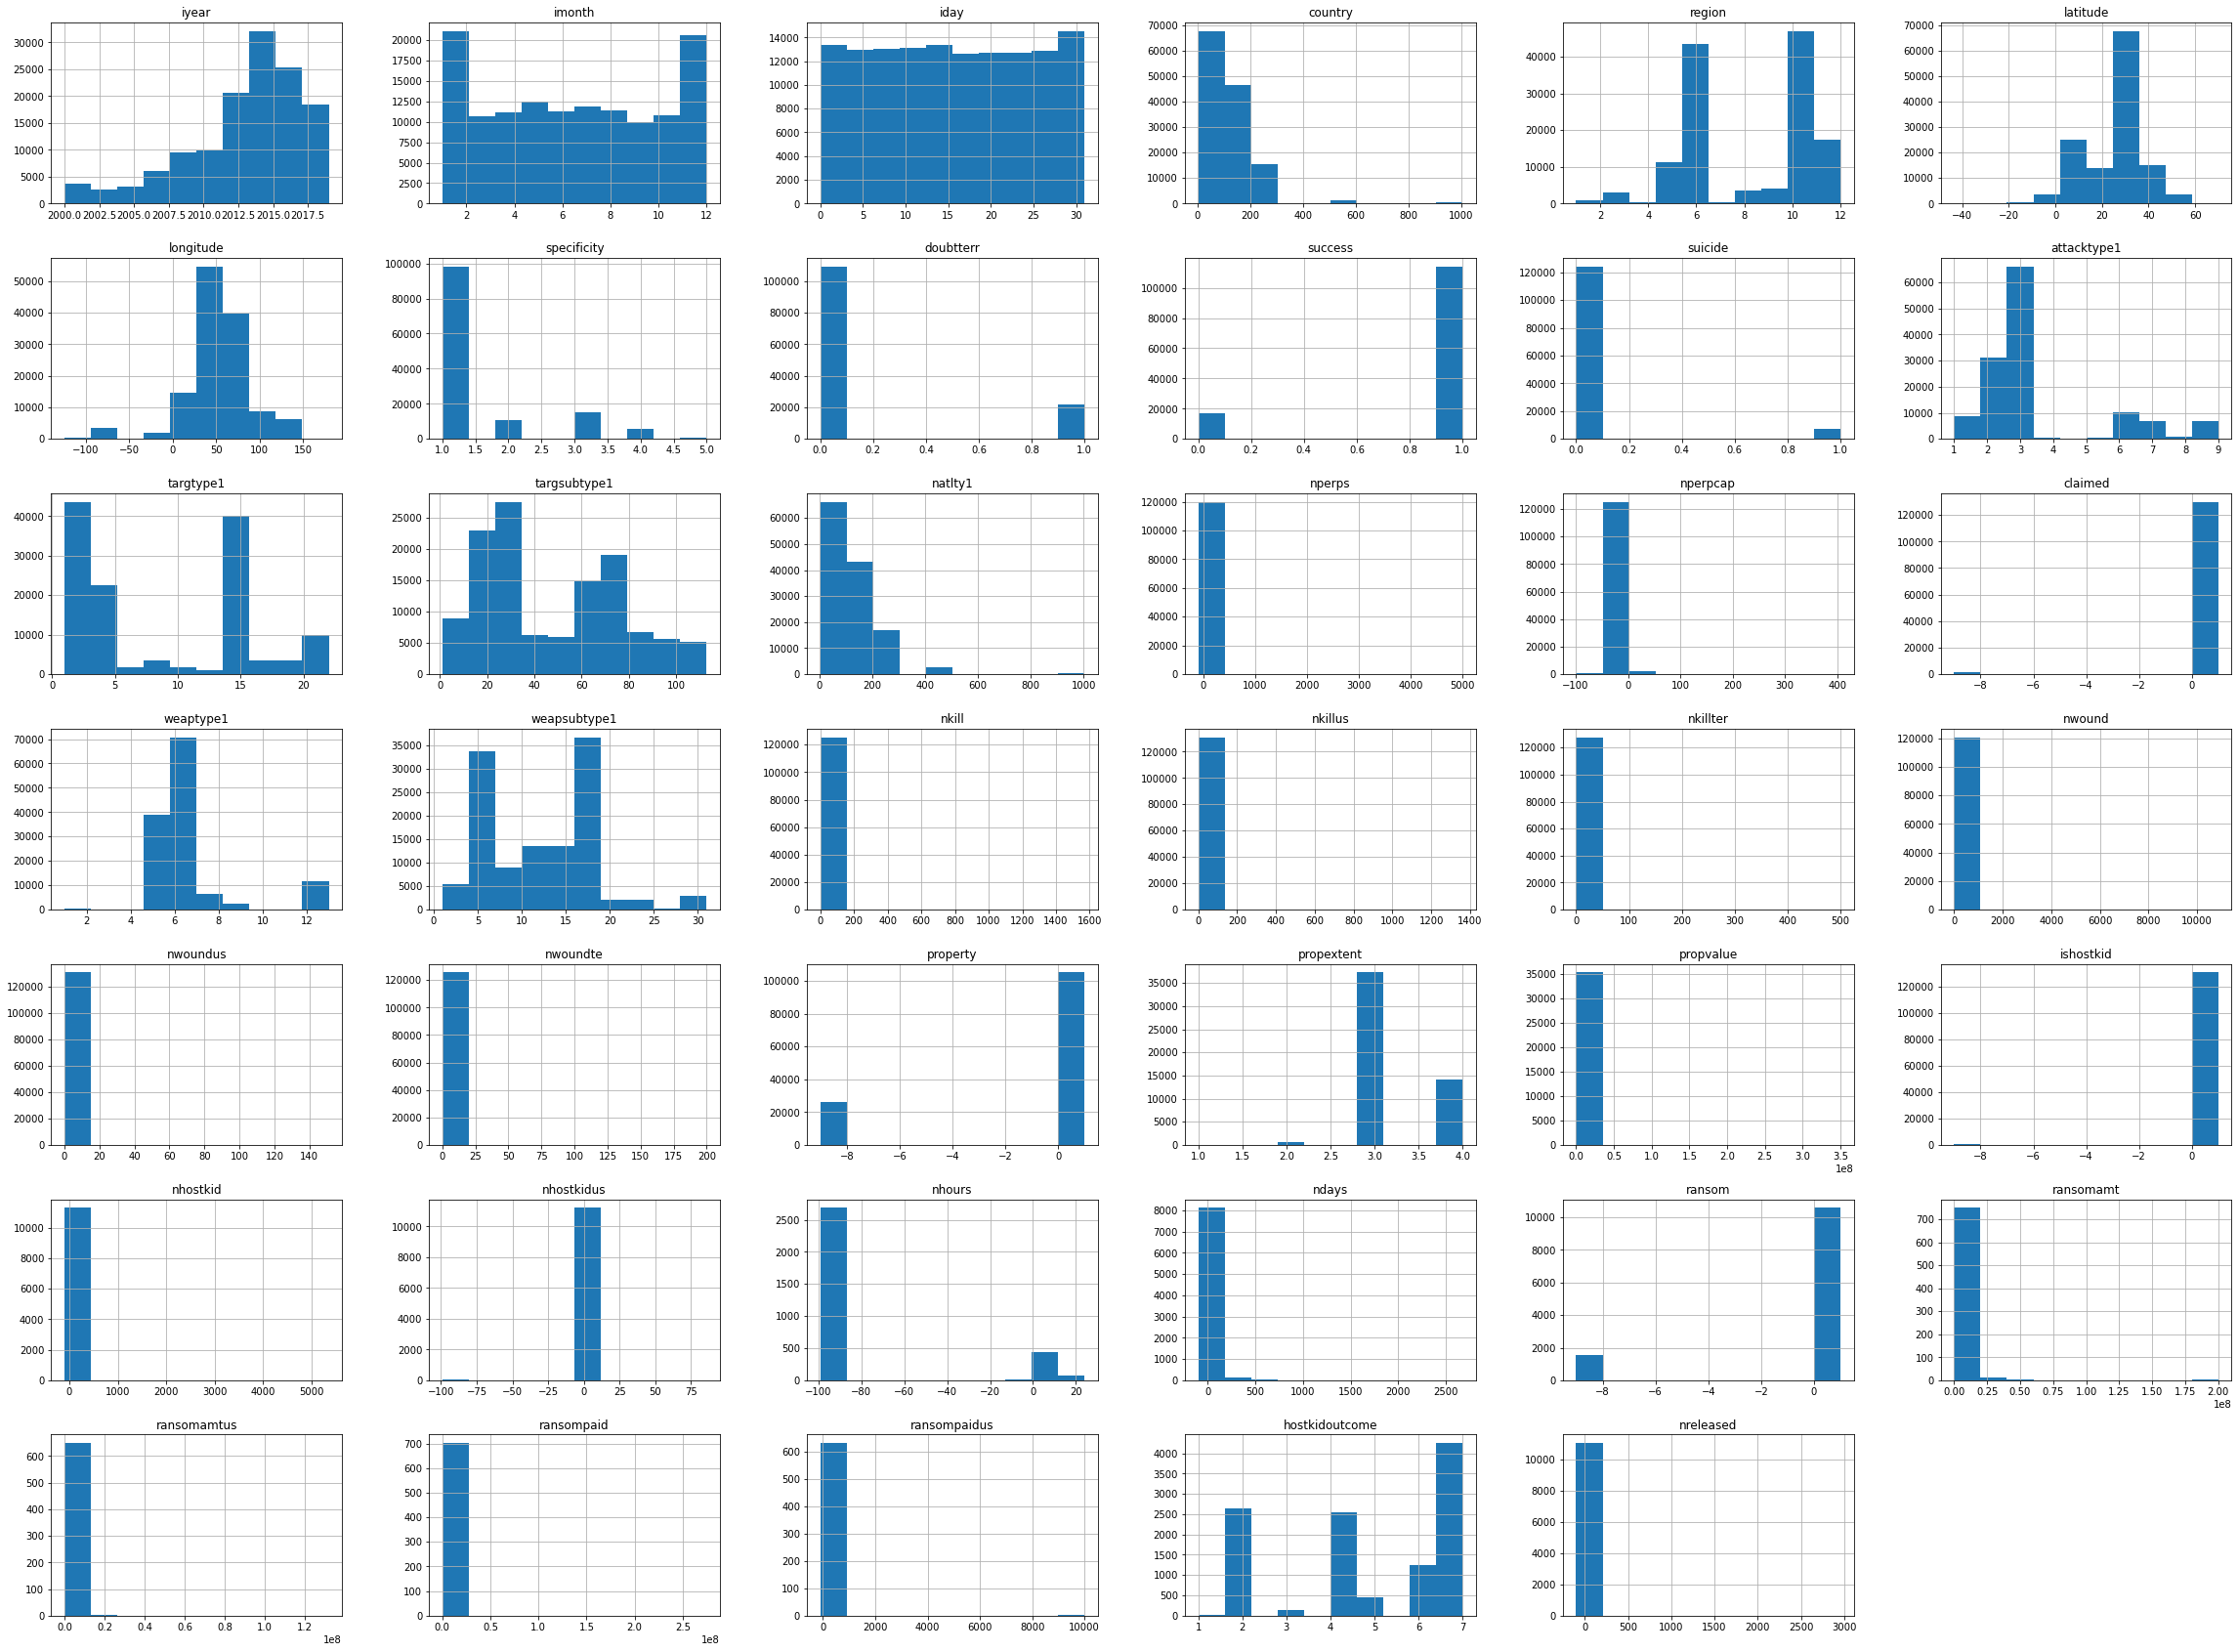

In [8]:
fig3 = plt.figure()
df.hist(figsize=(40,30))
plt.show()

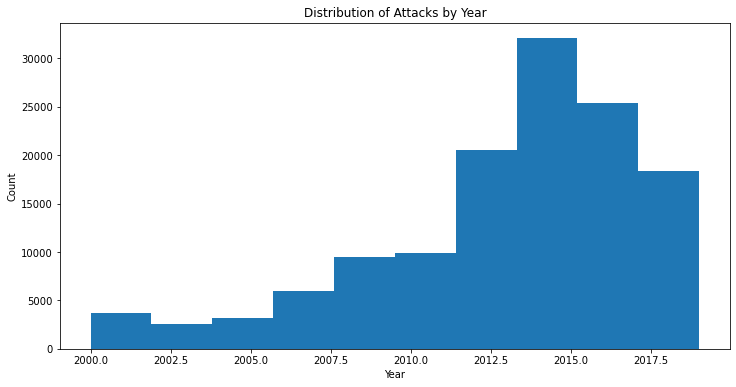

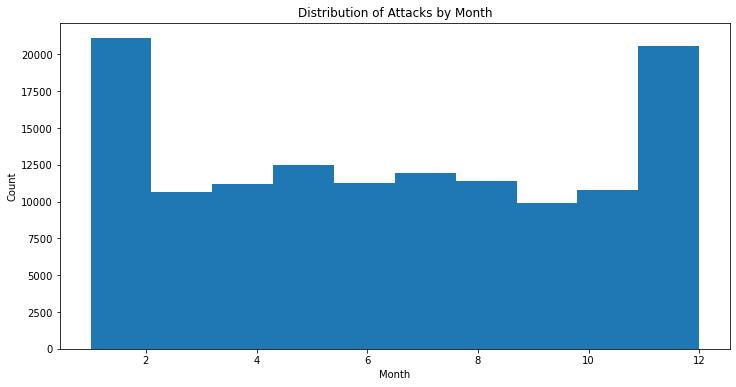

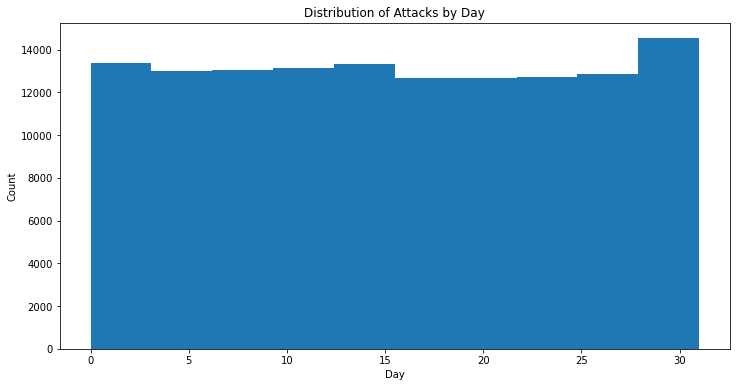

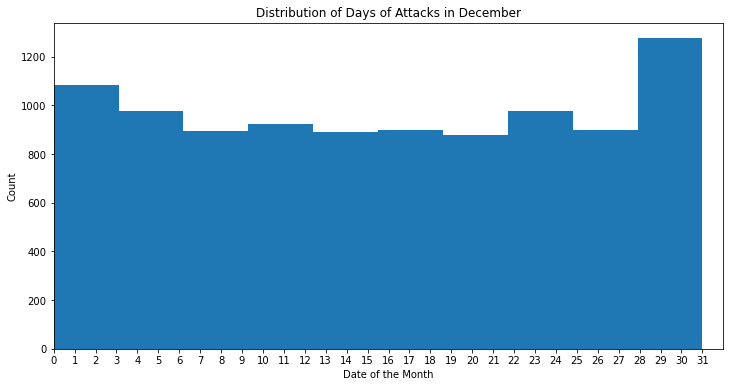

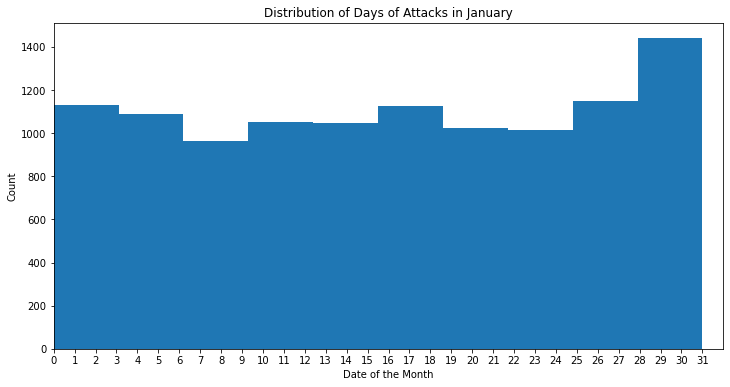

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = df['iyear'])
plt.title('Distribution of Attacks by Year')
plt.xlabel("Year")
plt.ylabel("Count")
#plt.savefig('DistYear.jpg')

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = df['imonth'])
plt.title('Distribution of Attacks by Month')
plt.xlabel("Month")
plt.ylabel("Count")
plt.savefig('DistMonths_CSProj.jpg')


fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = df['iday'])
plt.title('Distribution of Attacks by Day')
plt.xlabel("Day")
plt.ylabel("Count")
#plt.savefig('DistDay.jpg')

jan = df[df['imonth'] == 1]
dec = df[df['imonth'] == 12]

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = dec['iday'])
plt.title('Distribution of Days of Attacks in December')
plt.xlabel("Date of the Month")
plt.xticks(np.arange(0, 32))
plt.ylabel("Count")
ax.set_xlim(xmin=0, xmax=32, )
plt.savefig('DistDaysAttacksDec_CSProj.jpg')


fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x = jan['iday'])
plt.title('Distribution of Days of Attacks in January')
plt.xlabel("Date of the Month")
plt.xticks(np.arange(0, 32))
plt.ylabel("Count")
ax.set_xlim(xmin=0, xmax=32, )
plt.savefig('DistDaysAttacksJan_CSProj.jpg')

Text(0, 0.5, 'Count')

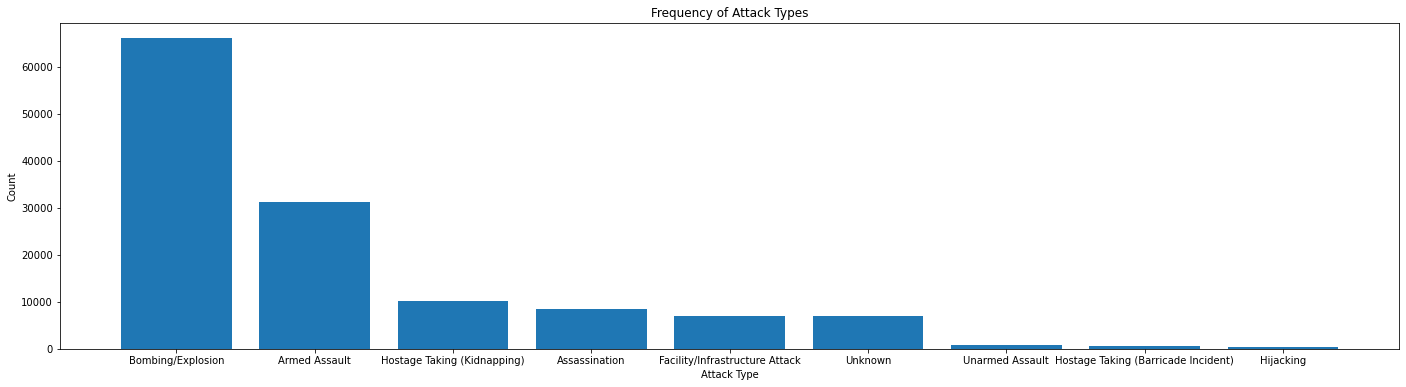

In [10]:
attack = df['attacktype1_txt'].value_counts()
attack = attack.to_dict()


fig = plt.figure(figsize=(24, 6))
plt.bar(x = attack.keys(), height = attack.values(), )
plt.title('Frequency of Attack Types')
plt.xlabel("Attack Type")
plt.ylabel("Count")
# plt.savefig('FreqAttacks.jpg')

# compclaim = df['claimmode_txt'].value_counts()
# compclaim = compclaim.to_dict()


# fig = plt.figure(figsize=(24, 6))
# plt.bar(x = compclaim.keys(), height = compclaim.values(), )
# plt.title('Count of Claim Responsibility')
# plt.xlabel("Claim Mode")
# plt.ylabel("Count")
# plt.savefig('ClaimMode.jpg')

In [11]:
#print(colnames)

In [12]:
df['nkill'] = df['nkill'].fillna(-1)
#print(set(df['nkill']))

df_plot = df[df['nkill'] > 0]
print(len(df_plot))
df_plot = df_plot[df_plot['nwound'].notna()]
print(len(df_plot))

66316
61876


In [13]:
df_plot_top = df_plot.nlargest(4000,'nkill')
#df_plot_top_10 = df_plot.nlargest(10,'nkill')

df_plot_top_10 = df_plot.sort_values(by=['nkill'], ascending=False)
df_plot_top_10 = df_plot_top_10[['iyear', 'imonth', 'iday', 'country_txt', 'nkill', 'attacktype1_txt']]
df_plot_top_10 = df_plot_top_10.drop_duplicates()
df_plot_top_10.head(10)

iyear  imonth  iday                       country_txt   nkill  \
4696    2001       9    11                     United States  1385.0   
28463   2014       6    10                              Iraq   670.0   
38453   2017      10    14                           Somalia   588.0   
7919    2004       3    21                             Nepal   518.0   
22461   2016       7     3                              Iraq   383.0   
8524    2004       9     1                            Russia   344.0   
9502    2018      12    16  Democratic Republic of the Congo   339.0   
3663    2018       5    15                       Afghanistan   330.0   
39522   2017      11    24                             Egypt   311.0   
16600   2016       2     7                              Iraq   300.0   

                           attacktype1_txt  
4696                             Hijacking  
28463                        Armed Assault  
38453                    Bombing/Explosion  
7919                         Armed Assault  
22461                    Bombing/Explosion  
8524   Hostage Taking (Barricade Incident)  
9502           Hostage Taking (Kidnapping)  
3663                     Bombing/Explosion  
39522                    Bombing/Explosion  
16600          Hostage Taking (Kidnapping)

In [14]:
get_ipython().run_line_magic('matplotlib', 'inline')

fig = px.scatter_mapbox(df_plot_top, lat="latitude", lon="longitude",zoom=3, height=300, 
                         color='iyear', size = "nkill", color_continuous_scale= 'Rainbow',
                         custom_data = ['country_txt', 'iyear', 'gname', 'nkill', 'nwound', 'targtype1_txt'])

fig.update_traces(
    hovertemplate="<br>".join([
        "City: %{customdata[0]}",
        "Year: %{customdata[1]}",
        "Group Name: %{customdata[2]}",
        "Killed: %{customdata[3]}",
        "Wounded: %{customdata[4]}",
        "Target Type: %{customdata[5]}"
            ]))


fig.update_layout(
    # add a title text for the plot
    title_text = 'Attack Types of Incidents Across the Globe with Magnitude of Nkilled',

    mapbox_style="white-bg",
    mapbox_layers=[
        {   "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
                ]
            }
          ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

import chart_studio

#    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~

# username = 'mry8ea' # your username
# api_key = 'QPR3L9tJz8eTSJkuvdzN' # your api key - go to profile > settings > regenerate key
# chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

# import chart_studio.plotly as py
# py.plot(fig, filename = 'CS5010 GTD Project', auto_open=True)

In [15]:
#nwound_iyear = df.groupby('iyear')['nwound'].sum()

# df['nkill_iyear'] = df['iyear'].map(nkill_iyear)
# df['nwound_iyear'] = df['iyear'].map(nwound_iyear)


nkill_iyear_country = df.groupby(['iyear', 'country_txt'])['nkill'].sum()
nkill_iyear_country = nkill_iyear_country.reset_index()

nkill_iyear_country = nkill_iyear_country[nkill_iyear_country['nkill'] > 0]

print(nkill_iyear_country['nkill'].min())

top_nkilled = nkill_iyear_country.sort_values(by=['nkill'], ascending=False)
top_nkilled.head(15)

1.0


iyear  country_txt    nkill
1160   2014         Iraq  13799.0
1363   2016         Iraq  12114.0
1530   2018  Afghanistan   9685.0
1259   2015         Iraq   8769.0
1639   2019  Afghanistan   8180.0
1188   2014      Nigeria   7703.0
1067   2013         Iraq   7002.0
569    2007         Iraq   6660.0
1465   2017         Iraq   6481.0
1221   2015  Afghanistan   6129.0
1319   2016  Afghanistan   6069.0
1427   2017  Afghanistan   6013.0
1287   2015      Nigeria   5512.0
1121   2014  Afghanistan   5360.0
498    2006         Iraq   4579.0

In [16]:
nkill_iyear_country = df.groupby(['iyear', 'country_txt'])['nkill'].sum()
nkill_iyear_country = nkill_iyear_country.reset_index()
#nkill_iyear_country.head()

# #    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~

max_nkill = nkill_iyear_country.nkill.max()
#print(max_nkill)

import plotly.express as px
gapminder = px.data.gapminder()
fig = px.choropleth(nkill_iyear_country,               
              locations="country_txt",
              locationmode = "country names",             
              color="nkill",
              hover_name="country_txt",  
              animation_frame="iyear"  ,     
              color_continuous_scale='Rainbow',  
              height=600 ,
                range_color= (0, max_nkill))   

fig.update_layout(
    # add a title text for the plot
    title_text = 'Number Killed by Terrorist Acts')


fig.show()

# #    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~


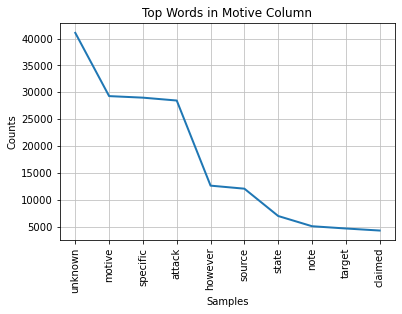

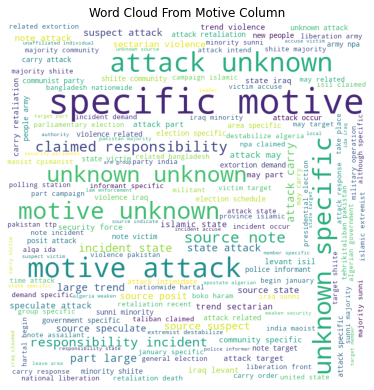

In [17]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud


def TextAnalysis(column):
    # Putting all of column content to 1 string
    
    df[column] = df[column].str.lower()
    
    sentence = df[column].tolist()
    sentence = str(sentence)

    # Initializing punctuations string  
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  
    # Removing punctuations in string 
    # Using loop + punctuation string   
    for ele in sentence:  
        if ele in punc:  
            sentence = sentence.replace(ele, "")     
    
    # Tokenizing word to remove stop words
    tokenized_word=word_tokenize(sentence)
   
    # Remove stop words and adding nan and al from empty values and city name
    stop_words=set(stopwords.words("english"))
    stop_words.add('nan')
    
    # Filtering sentence to remove stop words
    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)
    
    # Lemmatize with POS Tag --> https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    # Making filtered sentence single string to lemmatize
    filtered_sent = ' '.join(filtered_sent)
    
    # Init Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize string with the appropriate POS tag
    sentfinal = ([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(filtered_sent)])
    #print(sentfinal)

    # Print freq of words in final clean sentence
    fdist = FreqDist(sentfinal)
    
    # Making sentence a string from a list for word cloud
    str_sentfinal = ' '.join(map(str, sentfinal))
     
    #Printing top 5 most common words and freq.
    #print(fdist.most_common(5))
    
    fig1 = plt.figure()
    
    # Plotting top 30 words
    title = "Top Words in {} Column".format(column.capitalize())
    fdist.plot(10, cumulative=False, title=title)
    plt.title(title)
    fdist_fig_name = str(column) + '_fdist.jpg'  
    #fig1.savefig(fdist_fig_name, bbox_inches = "tight")

    # if using a Jupyter notebook, include:
    %matplotlib inline

    wordcloud = WordCloud(width = 700, height = 700, 
                    background_color ='white', 
                    min_font_size = 10).generate(str_sentfinal) 

    
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    titlewc = "Word Cloud From {} Column".format(column.capitalize())
    plt.title(titlewc)
    wc_fig_name = str(column) + '_wordcloud.jpg'
    #plt.savefig(wc_fig_name)
    plt.show()
    
    
#motive, target1, scite1, propcomment
TextAnalysis('motive')

In [18]:
findword = 'claimed'
numwords = 50
claimed = []

# Making entire column single string to analyze
summs = df['motive'].tolist()
summs = str(summs)

# Printing numwords words before and after word claimed if found
for i in summs.split('\n'):
    z = i.split(' ')

    for x in [x for (x, y) in enumerate(z) if findword in y]:
        claimed.append(' '.join(z[max(x-numwords,0):x+numwords+1]))
        
#pprint.pprint(claimed)

however = []
other = []
howev = 'however'

#If word has claimed, looking into which attacks had 'no group'

for i in claimed: 
    if howev in i:
        however.append(i)
    else:
        other.append(i)

pprint.pprint(however)

# f= open("CS5010_however.txt","w+")
# f.write(repr(however))
# f.close()

['unknown; however, authorities speculate that the planned explosion was '
 "intended to cause a panic amongst civilians', 'unknown', 'specific motive is "
 'unknown; however, authorities speculate that the planned explosion was '
 "intended to cause a panic amongst civilians', 'unknown', 'unknown', "
 "'unknown', 'unknown', 'unknown', 'unknown', 'specific motive is unknown, but "
 'the group that claimed responsibility for the attack called themselves the '
 "friends of prisoners who had anarchist ideologies.', 'unknown', 'unknown', "
 "'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', "
 "'unknown', 'unknown', 'specific motive is unknown, but sources speculate "
 "that the attack was caste-related.', 'unknown', 'unknown', 'unknown', "
 "'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', "
 "'unknown', 'unknown', 'unknown',",
 'attacks against canadian jewish facilties as tensions increase in the middle '
 "east.', 'specific motive 

 'ministry because the church’s congregation was predominantly african '
 'american.\', nan, "ansar al-sharia, a subgroup of al-qa\'ida in the arabian '
 'peninsula (aqap), claimed responsibility for the attack, stating that the '
 'bombing was carried out in revenge for the',
 'united states-backed war on the organization in southern yemen.", nan, nan, '
 'nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '
 'nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '
 "nan, nan, 'the brigades of imprisoned sheikh omar abdel-rahman claimed "
 'responsibility for the attack, stating that the lack of islamic affiliation '
 'was the motivating factor, identifying the offices of the red cross as a '
 '"christianization castle."\', "the specific motive is unknown; however, '
 'sources noted that the targeted home belonged to a member of the sahwa '
 'militia, a sunni group that',
 "'the specific motive is unknown; however, sources noted that the ta

 "government and islamist insurgents.', 'the baloch liberation front (blf) "
 'claimed responsibility for the incident via mobile phone messaging, stating '
 'that they executed the attack because the victims worked for secret '
 'agencies.\', nan, "jameel ahmad, spokesperson for jamiat ul-mujahedin (jum), '
 'claimed responsibility for the incident, stating that they were retaliating '
 'for the jammu and kashmir police\'s harrassment of kashmiri youth.", nan, '
 "nan, nan, nan, nan, 'the specific motive is unknown; however, sources note "
 'that the incident is consistent with a larger pattern of violence that aimed '
 'to coercively influence the filipino',
 'nan, nan, nan, nan, nan, "the specific motive is unknown; however, sources '
 'posit that lashkar-e-jhangvi (lej), an affiliate of tehrik-i-taliban '
 'pakistan (ttp), executed the attack because they were retaliating for the '
 'recent imprisonment of their leader malik ishaq and continuing their violent '
 'sectarian campaign

 "because he was opposed to abortion.', 'the specific motive is unknown; "
 'however, sources speculated that the attack was carried out in order to '
 'disrupt the process of building the military as an institution.\', "the '
 'specific motive is unknown; however,',
 'device may have been planted by security forces in order to secure their '
 "checkposts from militants.', 'the specific motive is unknown; however, "
 'sources speculated that the device may have been planted by security forces '
 "in order to secure their checkposts from militants.', nan, nan, nan, 'in a "
 'statement, mujahideen ansar claimed responsibility for the incident and '
 'stated that the attack was in retaliation to drone strikes.\', "the specific '
 'motive is unknown; however, sources speculated that the attack, which '
 'targeted members of the shiite community, is part of a larger trend of '
 "sectarian violence between iraq's sunni minority and shiite majority "
 'communities.",',
 'sunni minority and sh

 'incident and stated that',
 "as a headquarters for foreign intelligence.', nan, 'hamas (islamic "
 'resistance movement) claimed responsibility for the incident and stated that '
 'the attack was carried out in retaliation to recent military operations and '
 "the demolition of houses.', nan, nan, nan, nan, nan, nan, nan, nan, "
 '"alexandr kalyussky, a donetsk people\'s republic official, claimed '
 'responsibility for the incident and stated that anton skiba was targeted '
 'because he had encouraged killing pro-russia militia members for monetary '
 'gain on his facebook page.", nan, nan, nan, nan, \'the specific motive is '
 'unknown; however, sources posited that the attack was carried out because '
 'residents had removed boko haram',
 'stated that anton skiba was targeted because he had encouraged killing '
 'pro-russia militia members for monetary gain on his facebook page.", nan, '
 "nan, nan, nan, 'the specific motive is unknown; however, sources posited "
 'that the attack

 "adf members.', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, "
 "nan, nan, nan, 'the islamic state of iraq and the levant (isil) claimed "
 'responsibility for the incident and stated that the civilian was targeted '
 "for assisting the government in air strikes.', 'the specific motive is "
 'unknown; however, sources noted that the attack, which targeted a soldier '
 'guarding a polling station, was part of a larger trend of violence related '
 'to the tunisian presidential',
 "nan, nan, 'the specific motive is unknown; however, officials suspected that "
 'the bridge had been a desired target for the assailants for some time, as '
 'the bridge was frequently used by security forces and connected qaraqul '
 "district with the maimana-jawzjan highway.', nan, nan, 'the barqa province "
 'of the islamic state claimed responsibility for the incident and warned '
 "people not to sell cigarettes.', nan, nan, nan, nan, nan, nan, nan, nan, "
 'nan, nan, nan, nan, nan, nan, nan

 "nan, nan, nan, nan, nan, 'the islamic state of iraq and the levant (isil) "
 'claimed responsibility for the incident and stated that the victims were '
 "accused of blasphemy.', nan, nan, nan, nan, 'the baloch liberation front "
 '(blf) claimed responsibility for the incident and stated that the victim was '
 "accused of being an informant.', nan, nan, nan, nan, nan, nan, nan, nan, "
 "nan, nan, 'the specific motive is unknown; however, sources posited that a "
 'ransom was paid to the garo national liberation army in exchange for the '
 'release of',
 "nan, nan, nan, nan, nan, nan, nan, nan, nan, 'the specific motive is "
 'unknown; however, sources posited that a ransom was paid to the garo '
 "national liberation army in exchange for the release of the victims.', nan, "
 "nan, nan, nan, nan, nan, nan, nan, nan, 'the baloch republican army (bra) "
 'claimed responsibility for the incident and stated that investments must be '
 "approved by balochistan province before moving forwar

 'responsibility for the incident and stated that the victim was targeted '
 'because the group believed he was a spy.\', "the new people\'s army (npa) '
 'claimed responsibility for the incident and stated that datu benjamin omao '
 'was targeted for allegedly stealing land.", nan, nan, nan, nan, \'the '
 'specific motive is unknown; however, sources suspected that the attack may '
 "have been related to issues between members of the sikh community.', 'the "
 'red egbesu water lions claimed responsibility',
 '(npa) claimed responsibility for the incident and stated that datu benjamin '
 'omao was targeted for allegedly stealing land.", nan, nan, nan, nan, \'the '
 'specific motive is unknown; however, sources suspected that the attack may '
 "have been related to issues between members of the sikh community.', 'the "
 'red egbesu water lions claimed responsibility for the incident and demanded '
 "the release of two people being held by authorities.', nan, nan, 'the "
 'specific motiv

 'suspected that the attack was carried out in response to the transfer of the '
 'bank from sanaa to aden.\', nan, nan, nan, "lashkar-e-jhangvi claimed '
 'responsibility for the incident and stated that the victims, who were '
 'members of the shiite community, were targeted as part of a larger trend of '
 "sectarian violence between pakistan's majority sunni and minority shiite "
 'communities.", nan, nan, nan, nan, "the specific motive is unknown; however, '
 'sources suspected that the attack',
 "larger trend of sectarian violence between iraq's sunni minority and shiite "
 'majority communities.", nan, nan, nan, nan, nan, nan, nan, \'the specific '
 'motive is unknown; however, sources stated that the victims were accused of '
 'planning to participate in upcoming elections.\', nan, nan, nan, "the niger '
 'delta greenland justice mandate (ndgjm) claimed responsibility for the '
 'incident and refused to negotiate with the pan-niger delta forum led by '
 "chief edwin clark, citin

 "nan, nan, nan, nan, nan, nan, nan, nan, nan, 'the taliban claimed "
 'responsibility for the incident and stated that the victims were targeted '
 'because the group believed they were spies',
 'for the incident and stated that railway infrastructure was targeted because '
 'it represented "the central nervous system of capitalism."\', \'shutdown '
 'g20: take hamburg offline! claimed responsibility for the incident and '
 'stated that railway infrastructure was targeted because it represented "the '
 'central nervous system of capitalism."\', \'shutdown g20: take hamburg '
 'offline! claimed responsibility for the incident and stated that railway '
 'infrastructure was targeted because it represented "the central nervous '
 'system of capitalism."\', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '
 'nan, nan, nan, "the specific motive is unknown; however, sources posited '
 'that the attack was part of a larger trend',
 "to the islamic state of iraq and the levant (isil).', nan,

 'incident and stated that two of',
 "carrying out abductions.', nan, nan, nan, nan, nan, 'anarchists claimed "
 'responsibility for the incident and stated that the attack was "an '
 '\\\'expression of solidarity\\\' with constantinos giagtzoglou."\', nan, '
 '"the specific motive is unknown; however, sources stated that the assailants '
 'stole the shepherd\'s flock of sheep.", nan, nan, nan, \'boko haram claimed '
 'responsibility for the incident and stated that two of the victims were '
 'executed "because they were once muslims that have abandoned their islam, '
 'the moment they chose to work with the red cross, and for us, there is no '
 'difference between red cross and unicef."\', "the specific motive is '
 'unknown;',
 'to work with the red cross, and for us, there is no difference between red '
 'cross and unicef."\', "the specific motive is unknown; however, sources '
 "noted that the attack occurred two days following the afghani president's "
 'decision to begin peace ta

 'force the cameroonian government to',
 'soybean cultivation and producing transgenic corn."\', nan, nan, nan, nan, '
 "nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'separatists claimed "
 'responsibility for the incident and stated that the attack was carried out '
 'in order to force the cameroonian government to release all english-speaking '
 "separatist leaders from jail.', 'separatists claimed responsibility for the "
 'incident and stated that the attack was carried out in order to force the '
 'cameroonian government to release all english-speaking separatist leaders '
 "from jail.', nan, nan, nan, nan, 'the specific motive is unknown; however, "
 'sources suspected that khin than maung may have been targeted for allegedly '
 'being',
 'were targeted for stealing money and failing to respond to extortion '
 "demands.', 'the communist party of india - maoist (cpi-maoist) claimed "
 'responsibility for the incident and stated that the victims were targeted '
 "for stealing 

In [21]:
# code for all events - above has only has top 4000 events by nkilled

# get_ipython().run_line_magic('matplotlib', 'inline')

# fig = px.scatter_mapbox(df_plot, lat="latitude", lon="longitude",zoom=3, height=300, 
#                          color='iyear', size = "nkill", color_continuous_scale= 'Rainbow',
#                          custom_data = ['country_txt', 'iyear', 'gname', 'nkill', 'nwound', 'targtype1_txt'])

# fig.update_traces(
#     hovertemplate="<br>".join([
#         "City: %{customdata[0]}",
#         "Year: %{customdata[1]}",
#         "Group Name: %{customdata[2]}",
#         "Killed: %{customdata[3]}",
#         "Wounded: %{customdata[4]}",
#         "Target Type: %{customdata[5]}"
#             ]))


# fig.update_layout(
#     # add a title text for the plot
#     title_text = 'Attack Types of Incidents Across the Globe with Magnitude of Nkilled',

#     mapbox_style="white-bg",
#     mapbox_layers=[
#         {   "below": 'traces',
#             "sourcetype": "raster",
#             "sourceattribution": "United States Geological Survey",
#             "source": [
#                 "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
#                 ]
#             }
#           ])
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# fig.show()

# import chart_studio

# #    *~*~*~*~*~*~*~*~*~**~*~*~*~*~ ### KEEP THIS ###  *~*~*~*~*~*~*~*~*~**~*~*~*~*~*~*~*~*~*~*~*~*~*~**~*~*~*~*~

# # username = 'mry8ea' # your username
# # api_key = 'QPR3L9tJz8eTSJkuvdzN' # your api key - go to profile > settings > regenerate key
# # chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

# # import chart_studio.plotly as py
# # py.plot(fig, filename = 'CS5010 GTD Project', auto_open=True)